# Exploratory Data Analysis
IUM projekt - 2021Z

Zadanie 8, wariant 3

Authors: Michał Łątkowski, Vladyslav Kyryk

Task - optimalisation of products ordering for next week by predicting the demand


In [77]:
# Adding autoreload will let you edit your package and see the changes without restarting the notebook.

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
import pandas as pd
from datetime import datetime
import calendar

## Data import

In [79]:
deliveries = pd.read_json("../data/raw/deliveries.jsonl", lines=True)
products = pd.read_json("../data/raw/products.jsonl", lines=True)
sessions = pd.read_json("../data/raw/sessions.jsonl", lines=True)
users = pd.read_json("../data/raw/users.jsonl", lines=True)

## Data quality analysis in "deliveries" dataset

In [80]:
print("Typy w dataframe")
print(deliveries.dtypes)
print("\nIlosc pustych wartosci na kolumne")
print(deliveries.isna().sum())
deliveries["purchase_timestamp"] = pd.to_datetime(deliveries["purchase_timestamp"])
deliveries["delivery_timestamp"] = pd.to_datetime(deliveries["delivery_timestamp"])
deliveries["delivery_company"] = deliveries["delivery_company"].astype("Int64")
print("\nDataframe po probie konwersji typow")
print(deliveries.dtypes)
print(
    "\nCzy purchase_id to unikalny identyfikator? ",
    pd.Series(deliveries["purchase_id"]).is_unique,
)

Typy w dataframe
purchase_id             int64
purchase_timestamp     object
delivery_timestamp     object
delivery_company      float64
dtype: object

Ilosc pustych wartosci na kolumne
purchase_id             0
purchase_timestamp      0
delivery_timestamp    152
delivery_company      131
dtype: int64

Dataframe po probie konwersji typow
purchase_id                    int64
purchase_timestamp    datetime64[ns]
delivery_timestamp    datetime64[ns]
delivery_company               Int64
dtype: object

Czy purchase_id to unikalny identyfikator?  True


In [81]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   purchase_id         2975 non-null   int64         
 1   purchase_timestamp  2975 non-null   datetime64[ns]
 2   delivery_timestamp  2823 non-null   datetime64[ns]
 3   delivery_company    2844 non-null   Int64         
dtypes: Int64(1), datetime64[ns](2), int64(1)
memory usage: 96.0 KB


In [82]:
deliveries

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2021-01-09 20:27:33,2021-01-11 20:28:09,620
1,20002,2021-01-09 16:11:11,2021-01-12 16:13:44,360
2,20003,2021-01-09 20:33:15,2021-01-11 20:37:51,620
3,20004,2021-01-08 05:23:04,2021-01-12 05:23:36,516
4,20005,2021-01-10 19:50:56,2021-01-12 19:53:31,620
...,...,...,...,...
2970,22971,2021-01-03 02:05:42,2021-01-08 02:09:59,620
2971,22972,2021-01-02 22:00:31,2021-01-06 22:00:51,360
2972,22973,2021-01-01 21:30:29,2021-01-05 21:31:01,620
2973,22974,2021-01-03 04:38:40,NaT,360


In [83]:
deliveries['purchase_timestamp'].agg(['min', 'max'])

min   2021-01-01 03:23:09
max   2021-10-27 14:54:44
Name: purchase_timestamp, dtype: datetime64[ns]

In [84]:
deliveries['delivery_company'].value_counts()

620    975
516    941
360    928
Name: delivery_company, dtype: Int64

#### Number of deliveries per month

In [85]:
deliveries['delivery_month'] = deliveries['delivery_timestamp'].dropna().dt.month

<AxesSubplot:>

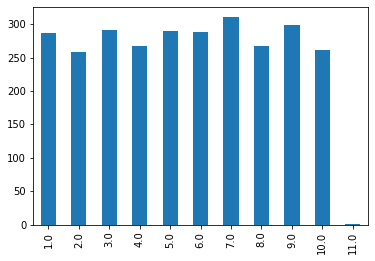

In [86]:
deliveries['delivery_month'].value_counts().sort_index().plot.bar()

## Data quality analysis in "products" dataset

In [87]:
print("Typy w dataframe")
print(products.dtypes)
print("\nIlosc pustych wartosci na kolumne")
print(products.isna().sum())
print(
    "\nCzy product_id to unikalny identyfikator?",
    pd.Series(products["product_id"]).is_unique,
)
print("\nLiczba niedodatnich cen", products["price"][products["price"] <= 0].count())
print("\nProdukty podejrzanie drogie (czesc moze byc poprawna)")
q = products["price"].quantile(0.90)
print(products[products["price"] > q])
print(
    "\nCzy wszystkie wartosci w kolumnie product_name sa stringami?",
    (products["product_name"].apply(type) == str).all(),
)
print(
    "\nCzy wszystkie wartosci w kolumnie category_path sa stringami?",
    (products["category_path"].apply(type) == str).all(),
)

Typy w dataframe
product_id         int64
product_name      object
category_path     object
price            float64
dtype: object

Ilosc pustych wartosci na kolumne
product_id       0
product_name     0
category_path    0
price            0
dtype: int64

Czy product_id to unikalny identyfikator? True

Liczba niedodatnich cen 20

Produkty podejrzanie drogie (czesc moze byc poprawna)
     product_id                                       product_name  \
1          1002                                 Kyocera FS-1135MFP   
2          1003                                 Kyocera FS-3640MFP   
3          1004                               Fallout 3 (Xbox 360)   
32         1033                                LCD Iiyama T1932MSC   
34         1035                      Samsung Galaxy S III GT-i9300   
64         1065                                    LCD Asus PA248Q   
65         1066                                 LCD Iiyama T1931SR   
74         1075                                     Ri

In [88]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     319 non-null    int64  
 1   product_name   319 non-null    object 
 2   category_path  319 non-null    object 
 3   price          319 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.1+ KB


In [89]:
products

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49990000.00
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,-49.99
...,...,...,...,...
314,1315,Jabra Talk,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,54.99
315,1316,Plantronics Voyager Legend,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,249.00
316,1317,Plantronics Savi W740,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,1303.96
317,1318,Plantronics Savi W710,Sprzęt RTV;Audio;Słuchawki,-553.00


In [90]:
products[products['price'] < 0]

,product_id,product_name,category_path,price
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,-49.99
37,1038,LCD Asus VK278Q,Komputery;Monitory;Monitory LCD,-1117.01
46,1047,Pirates of the Caribbean At World&#39;s End (PS3),Gry i konsole;Gry na konsole;Gry PlayStation3,-89.90
51,1052,Duke Nukem Forever (PC),Gry i konsole;Gry komputerowe,-78.90
54,1055,Call of Duty Modern Warfare 3 (PC),Gry i konsole;Gry komputerowe,-32.99
129,1130,Tom Clancy&#39;s Ghost Recon 4 Future Soldier ...,Gry i konsole;Gry na konsole;Gry Xbox 360,-49.99
153,1154,Civilization 4 (PC),Gry i konsole;Gry komputerowe,-40.90
163,1164,Aliens Colonial Marines (PC),Gry i konsole;Gry komputerowe,-112.99
201,1202,Final Fantasy 14 (PC),Gry i konsole;Gry komputerowe,-135.90
202,1203,LEGO Batman 2 DC Super Heroes (PC),Gry i konsole;Gry komputerowe,-29.99


In [91]:
products[products['price'] < 0].shape[0]

20

In [92]:
products[products['price'] > 5000].sort_values(by='price')

,product_id,product_name,category_path,price
80,1081,OKI B840dn,Komputery;Drukarki i skanery;Biurowe urządzeni...,5.259000e+03
79,1080,Kyocera FS-3140MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,5.301900e+03
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7.639000e+03
111,1112,Singularity (PC),Gry i konsole;Gry komputerowe,8.900000e+06
150,1151,Mafia 2 (PC),Gry i konsole;Gry komputerowe,1.190000e+07
139,1140,Euro Truck Simulator 2 (PC),Gry i konsole;Gry komputerowe,1.299000e+07
196,1197,Hearts of Iron 3 (PC),Gry i konsole;Gry komputerowe,1.599000e+07
213,1214,Call of Cthulhu Mroczne zakamarki Świata (PC),Gry i konsole;Gry komputerowe,1.899000e+07
216,1217,Hitman Krwawa Forsa (PC),Gry i konsole;Gry komputerowe,1.990000e+07
268,1269,Space Hack (PC),Gry i konsole;Gry komputerowe,1.999000e+07


In [93]:
products[products['price'] > 5000].shape[0]

22

In [94]:
products[products['price'] > 1000000].sort_values(by='price')

,product_id,product_name,category_path,price
111,1112,Singularity (PC),Gry i konsole;Gry komputerowe,8.900000e+06
150,1151,Mafia 2 (PC),Gry i konsole;Gry komputerowe,1.190000e+07
139,1140,Euro Truck Simulator 2 (PC),Gry i konsole;Gry komputerowe,1.299000e+07
196,1197,Hearts of Iron 3 (PC),Gry i konsole;Gry komputerowe,1.599000e+07
213,1214,Call of Cthulhu Mroczne zakamarki Świata (PC),Gry i konsole;Gry komputerowe,1.899000e+07
216,1217,Hitman Krwawa Forsa (PC),Gry i konsole;Gry komputerowe,1.990000e+07
268,1269,Space Hack (PC),Gry i konsole;Gry komputerowe,1.999000e+07
235,1236,Avencast Rise of the Mage (PC),Gry i konsole;Gry komputerowe,3.199000e+07
245,1246,Quake 4 (PC),Gry i konsole;Gry komputerowe,3.399000e+07
218,1219,Overlord 2 (PC),Gry i konsole;Gry komputerowe,3.499000e+07


In [95]:
products[products['price'] > 1000000].shape[0]

19

In [96]:
products['category_path'].value_counts()

Gry i konsole;Gry komputerowe                                        202
Gry i konsole;Gry na konsole;Gry Xbox 360                             32
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                    30
Komputery;Monitory;Monitory LCD                                       17
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne         9
Gry i konsole;Gry na konsole;Gry PlayStation3                          9
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące      5
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe        4
Telefony i akcesoria;Telefony komórkowe                                2
Sprzęt RTV;Video;Odtwarzacze DVD                                       2
Komputery;Tablety i akcesoria;Tablety                                  2
Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4               2
Telefony i akcesoria;Telefony stacjonarne                              1
Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D 

In [97]:
products['main_category'] = products['category_path'].apply(lambda x: x.split(';')[0])
products['main_category'].value_counts()

Gry i konsole           243
Sprzęt RTV               36
Komputery                28
Telefony i akcesoria     12
Name: main_category, dtype: int64

In [98]:
products['second_category'] = products['category_path'].apply(lambda x: x.split(';')[1])
products['second_category'].value_counts()

Gry komputerowe            202
Gry na konsole              41
Video                       33
Monitory                    17
Drukarki i skanery           9
Akcesoria telefoniczne       9
Telefony komórkowe           2
Tablety i akcesoria          2
Przenośne audio i video      2
Telefony stacjonarne         1
Audio                        1
Name: second_category, dtype: int64

#### Min/max price in each category

In [99]:
products[['category_path', 'price']].groupby(by='category_path').agg(['min', 'max'])

price              
                                                        min           max
category_path                                                            
Gry i konsole;Gry komputerowe                       -135.90  9.400000e+07
Gry i konsole;Gry na konsole;Gry PlayStation3        -89.90  1.290000e+02
Gry i konsole;Gry na konsole;Gry Xbox 360            -49.99  8.999000e+07
Komputery;Drukarki i skanery;Biurowe urządzenia...  1998.14  5.126000e+09
Komputery;Monitory;Monitory LCD                    -1117.01  3.029000e+03
Komputery;Tablety i akcesoria;Tablety               1816.97  2.317020e+03
Sprzęt RTV;Audio;Słuchawki                          -553.00 -5.530000e+02
Sprzęt RTV;Przenośne audio i video;Odtwarzacze ...    64.80  7.890000e+01
Sprzęt RTV;Video;Odtwarzacze DVD                    -193.00  1.090000e+02
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV   -89.99  7.999000e+07
Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D    99.99  9.999000e+01
Telefony i akcesoria;Akcesoria telefoniczne;Zes...  -245.00  3.274700e+08
Telefony i akcesoria;Akcesoria telefoniczne;Zes...    14.99  1.303960e+03
Telefony i akcesoria;Telefony komórkowe              207.33  2.199900e+03
Telefony i akcesoria;Telefony stacjonarne             58.97  5.897000e+01

## Data quality analysis in "sessions" dataset

In [100]:
print("Typy w dataframe")
print(sessions.dtypes)
print("\nIlosc pustych wartosci na kolumne")
print(sessions.isna().sum())
sessions["user_id"] = sessions["user_id"].astype("Int64")
sessions["product_id"] = sessions["product_id"].astype("Int64")
sessions["purchase_id"] = sessions["purchase_id"].astype("Int64")
print("\nDataframe po probie konwersji typow")
print(sessions.dtypes)

Typy w dataframe
session_id                   int64
timestamp           datetime64[ns]
user_id                    float64
product_id                 float64
event_type                  object
offered_discount             int64
purchase_id                float64
dtype: object

Ilosc pustych wartosci na kolumne
session_id               0
timestamp                0
user_id               8723
product_id            8495
event_type               0
offered_discount         0
purchase_id         170657
dtype: int64

Dataframe po probie konwersji typow
session_id                   int64
timestamp           datetime64[ns]
user_id                      Int64
product_id                   Int64
event_type                  object
offered_discount             int64
purchase_id                  Int64
dtype: object


In [101]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173632 entries, 0 to 173631
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   session_id        173632 non-null  int64         
 1   timestamp         173632 non-null  datetime64[ns]
 2   user_id           164909 non-null  Int64         
 3   product_id        165137 non-null  Int64         
 4   event_type        173632 non-null  object        
 5   offered_discount  173632 non-null  int64         
 6   purchase_id       2975 non-null    Int64         
dtypes: Int64(3), datetime64[ns](1), int64(2), object(1)
memory usage: 9.8+ MB


In [102]:
sessions

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,100001,2021-01-09 20:25:15,104,1044,VIEW_PRODUCT,0,<NA>
1,100001,2021-01-09 20:27:03,104,1043,VIEW_PRODUCT,0,<NA>
2,100001,2021-01-09 20:27:33,104,1043,BUY_PRODUCT,0,20001
3,100002,2021-01-09 15:07:56,107,1305,VIEW_PRODUCT,10,<NA>
4,100002,2021-01-09 15:08:11,107,1292,VIEW_PRODUCT,10,<NA>
...,...,...,...,...,...,...,...
173627,109864,2021-01-01 12:55:09,297,1064,VIEW_PRODUCT,10,<NA>
173628,109864,2021-01-01 12:56:26,297,1033,VIEW_PRODUCT,10,<NA>
173629,109864,2021-01-01 13:00:56,297,1017,VIEW_PRODUCT,10,<NA>
173630,109864,2021-01-01 13:05:38,297,1017,BUY_PRODUCT,10,22975


In [103]:
sessions['timestamp'].agg(['min', 'max'])

min   2021-01-01 00:00:22
max   2021-10-27 15:37:51
Name: timestamp, dtype: datetime64[ns]

In [104]:
sessions[['event_type']].value_counts()

event_type  
VIEW_PRODUCT    170657
BUY_PRODUCT       2975
dtype: int64

3000 kupionych produktów to zamało dla wytrenowania dobrego modelu przy 319 produktach

In [105]:
buy_sessions = sessions[sessions['event_type'] == 'BUY_PRODUCT']

In [106]:
buy_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 2 to 173630
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   session_id        2975 non-null   int64         
 1   timestamp         2975 non-null   datetime64[ns]
 2   user_id           2822 non-null   Int64         
 3   product_id        2826 non-null   Int64         
 4   event_type        2975 non-null   object        
 5   offered_discount  2975 non-null   int64         
 6   purchase_id       2975 non-null   Int64         
dtypes: Int64(3), datetime64[ns](1), int64(2), object(1)
memory usage: 194.7+ KB


- 153 sesji bez user_id - ale user_id nie jest dla nas krytyczny
- 149 sesji abez product_id - nie możemy użyć tych sesji bez product_ids

### Number of sessions over different time periods

#### Number of all sessions per month

In [107]:
sessions['session_month'] = sessions['timestamp'].dropna().dt.month

<AxesSubplot:>

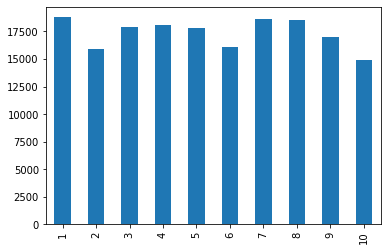

In [108]:
sessions['session_month'].value_counts().sort_index().plot.bar()

#### Number of buy_product sessions per month

In [109]:
buy_sessions['session_month'] = buy_sessions['timestamp'].dropna().dt.month

/opt/miniconda3/envs/ium/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

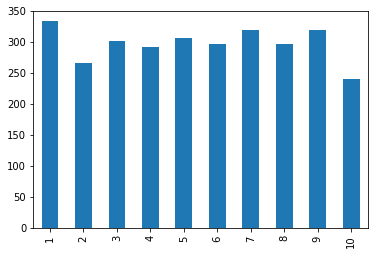

In [110]:
buy_sessions['session_month'].value_counts().sort_index().plot.bar()

#### Number of all sessions per week

In [111]:
sessions['session_week'] = sessions['timestamp'].dropna().dt.week

/opt/miniconda3/envs/ium/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

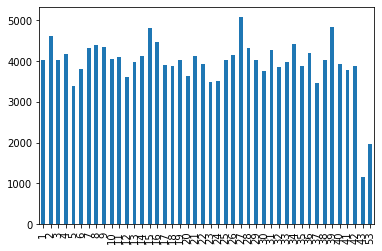

In [112]:
sessions['session_week'].value_counts().sort_index().plot.bar()

#### Number of buy_product sessions per week

In [113]:
buy_sessions['session_week'] = buy_sessions['timestamp'].dropna().dt.week

/opt/miniconda3/envs/ium/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/opt/miniconda3/envs/ium/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

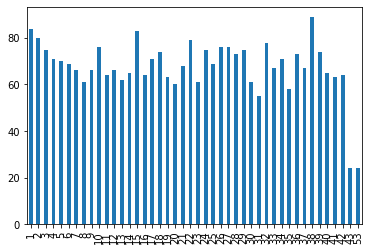

In [114]:
buy_sessions['session_week'].value_counts().sort_index().plot.bar()

#### Number of all sessions per weekday

In [115]:
sessions['session_weekday'] = sessions['timestamp'].dropna().dt.weekday

<AxesSubplot:>

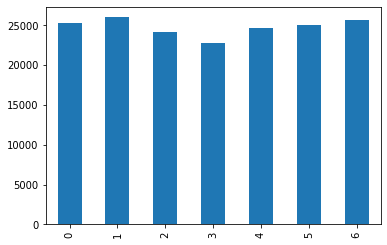

In [116]:
sessions['session_weekday'].value_counts().sort_index().plot.bar()

#### Number of buy_product sessions per weekday

In [117]:
buy_sessions['session_weekday'] = buy_sessions['timestamp'].dropna().dt.weekday

/opt/miniconda3/envs/ium/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

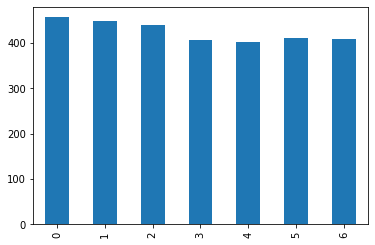

In [118]:
buy_sessions['session_weekday'].value_counts().sort_index().plot.bar()

## Data quality analysis in "users" dataset

In [119]:
print("Typy w dataframe")
print(users.dtypes)
print("\nIlosc pustych wartosci na kolumne")
print(users.isna().sum())
print("\nCzy user_id to unikalny identyfikator?", pd.Series(users["user_id"]).is_unique)
print(
    "\nCzy wszystkie wartosci w kolumnie name sa stringami?",
    (users["name"].apply(type) == str).all(),
)
print(
    "\nCzy wszystkie wartosci w kolumnie city sa stringami?",
    (users["city"].apply(type) == str).all(),
)
print(
    "\nCzy wszystkie wartosci w kolumnie street sa stringami?",
    (users["street"].apply(type) == str).all(),
)

Typy w dataframe
user_id     int64
name       object
city       object
street     object
dtype: object

Ilosc pustych wartosci na kolumne
user_id    0
name       0
city       0
street     0
dtype: int64

Czy user_id to unikalny identyfikator? True

Czy wszystkie wartosci w kolumnie name sa stringami? True

Czy wszystkie wartosci w kolumnie city sa stringami? True

Czy wszystkie wartosci w kolumnie street sa stringami? True


In [120]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  200 non-null    int64 
 1   name     200 non-null    object
 2   city     200 non-null    object
 3   street   200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


In [121]:
users

,user_id,name,city,street
0,102,Tymoteusz Wołos,Warszawa,al. Żwirowa 08
1,103,Olgierd Wardziak,Kraków,aleja Wybickiego 12/30
2,104,Urszula Kowaluk,Kraków,ulica Strumykowa 51/91
3,105,Roksana Hajdukiewicz,Szczecin,ul. Wyzwolenia 679
4,106,Julian Fulara,Wrocław,aleja Dworska 63
...,...,...,...,...
195,297,Marcelina Guziak,Warszawa,plac Słowackiego 43/14
196,298,Marianna Koźlak,Radom,aleja Stroma 64/71
197,299,Tymoteusz Tórz,Kraków,plac Matejki 24/06
198,300,Łukasz Faryna,Kraków,al. Zakątek 36/81


In [122]:
users['city'].value_counts()

Szczecin    37
Warszawa    33
Poznań      32
Radom       31
Kraków      28
Wrocław     22
Gdynia      17
Name: city, dtype: int64

## Data quality analysis between multiple datasets

### Check if there are purchases in deliveries which are not in sessions and vice verca

In [123]:
deliveries[~deliveries['purchase_id'].isin(sessions['purchase_id'])]

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,delivery_month


In [124]:
sessions[~sessions['purchase_id'].isin(deliveries['purchase_id'])]['event_type'].value_counts()

VIEW_PRODUCT    170657
Name: event_type, dtype: int64